# Mineração de Emoção em Textos com Python e NLTK

- Mineração de Textos
- Mineração de Emoções
- Classificação

Entrada -> Classificador ->  Saída

- Entradas: Fontes (Livros, Jornais, Revistas, E-mails, etc.) e Arquivos de Texto (PDF, XML, JSON, etc.)
- Classificador: Algoritmo
- Saída: Classe, Tópicos, etc.

**Utilizações**:

- Agrupamento (clustering).
- Extração da Informação (Texto -> Template).
  - Utilização de ontologias, representando conceitos e relacionamentos em um domínio (Livro - Escrito Por - Autor; Livro - Editado Por - Editora; Livro - Escrito Em - País)
- Associações: Correlação entre palavras.
  - "60% dos textos que contêm a palavra 'Internacional" também contêm a palavra 'Grêmio' (Representação: {"Internacional"} -> {Grêmio}).
- Casamento de Esquemas: Correspondências Semânticas.
   - Consulta Usuário -> Matcher -> Consulta SQL
- Recuperação da Informação.
- Sumarização de Documentos.

**Abordagens**:

- Estatística: Frequência dos termos;
- Processamento de Linguagem Natural: Interpretação sintática e semântica das frases, fazendo o computador entender textos em linguagem humana;

## Pré-Processamento dos Textos

- Natural Language Toolkit ([NLTK](https://www.nltk.org/));
- Stop Words;
- Radical das Palavras (Stemming);
- Distribuição da frequência das palavras;
- Montagem da base de dados para classificação;

In [ ]:
!pip install nltk==3.8.1
import nltk
nltk.download('all')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 30.2 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.9.1
    Uninstalling nltk-3.9.1:
      Successfully uninstalled nltk-3.9.1


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [ ]:
base = [('eu sou admirada por muitos','alegria'),
        ('me sinto completamente amado','alegria'),
        ('amar e maravilhoso','alegria'),
        ('estou me sentindo muito animado novamente','alegria'),
        ('eu estou muito bem hoje','alegria'),
        ('que belo dia para dirigir um carro novo','alegria'),
        ('o dia está muito bonito','alegria'),
        ('estou contente com o resultado do teste que fiz no dia de ontem','alegria'),
        ('o amor e lindo','alegria'),
        ('nossa amizade e amor vai durar para sempre', 'alegria'),
        ('estou amedrontado', 'medo'),
        ('ele esta me ameacando a dias', 'medo'),
        ('isso me deixa apavorada', 'medo'),
        ('este lugar e apavorante', 'medo'),
        ('se perdermos outro jogo seremos eliminados e isso me deixa com pavor', 'medo'),
        ('tome cuidado com o lobisomem', 'medo'),
        ('se eles descobrirem estamos encrencados', 'medo'),
        ('estou tremendo de medo', 'medo'),
        ('eu tenho muito medo dele', 'medo'),
        ('estou com medo do resultado dos meus testes', 'medo')]

print(len(base))

20


### Remoção de Stop Words

Remoção de palavras cujo significado não ajudam os algoritmos.

- Artigos não irão ajudar a diferenciar medo e alegria;

In [ ]:
stopwords = ['a', 'agora', 'algum', 'alguma', 'aquele', 'aqueles', 'de', 'deu', 'do', 'e', 'estou', 'esta', 'esta', 'ir', 'meu', 'muito', 'mesmo', 'no', 'nossa', 'o', 'outro', 'para', 'que', 'sem', 'talvez', 'tem', 'tendo', 'tenha', 'teve', 'tive', 'todo', 'um', 'uma', 'umas', 'uns', 'vou']

def remove_stop_words(texto):
  frases = []
  for (palavras, emocao) in texto:
    sem_stop = [p for p in palavras.split() if p not in stopwords]
    frases.append((sem_stop, emocao))
  return frases

print(remove_stop_words(base))

[(['eu', 'sou', 'admirada', 'por', 'muitos'], 'alegria'), (['me', 'sinto', 'completamente', 'amado'], 'alegria'), (['amar', 'maravilhoso'], 'alegria'), (['me', 'sentindo', 'animado', 'novamente'], 'alegria'), (['eu', 'bem', 'hoje'], 'alegria'), (['belo', 'dia', 'dirigir', 'carro', 'novo'], 'alegria'), (['dia', 'está', 'bonito'], 'alegria'), (['contente', 'com', 'resultado', 'teste', 'fiz', 'dia', 'ontem'], 'alegria'), (['amor', 'lindo'], 'alegria'), (['amizade', 'amor', 'vai', 'durar', 'sempre'], 'alegria'), (['amedrontado'], 'medo'), (['ele', 'me', 'ameacando', 'dias'], 'medo'), (['isso', 'me', 'deixa', 'apavorada'], 'medo'), (['este', 'lugar', 'apavorante'], 'medo'), (['se', 'perdermos', 'jogo', 'seremos', 'eliminados', 'isso', 'me', 'deixa', 'com', 'pavor'], 'medo'), (['tome', 'cuidado', 'com', 'lobisomem'], 'medo'), (['se', 'eles', 'descobrirem', 'estamos', 'encrencados'], 'medo'), (['tremendo', 'medo'], 'medo'), (['eu', 'tenho', 'medo', 'dele'], 'medo'), (['com', 'medo', 'resultad

In [ ]:
stopwords_nltk = nltk.corpus.stopwords.words('portuguese')
print("stopwords_nltk (pt): ", stopwords_nltk)

def remove_stop_words(texto):
  frases = []
  for (palavras, emocao) in texto:
    sem_stop = [p for p in palavras.split() if p not in stopwords_nltk]
    frases.append((sem_stop, emocao))
  return frases

print("Removed Stop Words: ", remove_stop_words(base))

stopwords_nltk (pt):  ['a', 'à', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'às', 'até', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles', 'depois', 'do', 'dos', 'e', 'é', 'ela', 'elas', 'ele', 'eles', 'em', 'entre', 'era', 'eram', 'éramos', 'essa', 'essas', 'esse', 'esses', 'esta', 'está', 'estamos', 'estão', 'estar', 'estas', 'estava', 'estavam', 'estávamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéssemos', 'estou', 'eu', 'foi', 'fomos', 'for', 'fora', 'foram', 'fôramos', 'forem', 'formos', 'fosse', 'fossem', 'fôssemos', 'fui', 'há', 'haja', 'hajam', 'hajamos', 'hão', 'havemos', 'haver', 'hei', 'houve', 'houvemos', 'houver', 'houvera', 'houverá', 'houveram', 'houvéramos', 'houverão', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houveríamos', 'houvermos', 'houvesse', 

### Extração de Radical (Stemming)

Ajuda a diminuir a dimensionalidade dos dados.

- Palavra = Prefixo + Radical + Sufixo

`nltk.stem` possui `Stemmers` que são interfaces usadas para remover afixos morfológicos das palavras.

In [ ]:
# Função que aplica stemmer, já removendo stop words
def apply_stemer(texto):
  # Stemmer para português
  stemmer = nltk.stem.RSLPStemmer()
  frases_sem_stemming = []
  for (palavras, emocao) in texto:
    com_stemming = [str(stemmer.stem(p)) for p in palavras.split() if p not in stopwords_nltk]
    frases_sem_stemming.append((com_stemming, emocao))
  return frases_sem_stemming

frases_com_stemming = apply_stemer(base)
print(frases_com_stemming)

[(['admir', 'muit'], 'alegria'), (['sint', 'complet', 'am'], 'alegria'), (['am', 'maravilh'], 'alegria'), (['sent', 'anim', 'nov'], 'alegria'), (['bem', 'hoj'], 'alegria'), (['bel', 'dia', 'dirig', 'carr', 'nov'], 'alegria'), (['dia', 'bonit'], 'alegria'), (['cont', 'result', 'test', 'fiz', 'dia', 'ont'], 'alegria'), (['am', 'lind'], 'alegria'), (['amizad', 'am', 'vai', 'dur', 'sempr'], 'alegria'), (['amedront'], 'medo'), (['ameac', 'dia'], 'medo'), (['deix', 'apavor'], 'medo'), (['lug', 'apavor'], 'medo'), (['perd', 'outr', 'jog', 'elimin', 'deix', 'pav'], 'medo'), (['tom', 'cuid', 'lobisom'], 'medo'), (['descobr', 'encrenc'], 'medo'), (['trem', 'med'], 'medo'), (['med'], 'medo'), (['med', 'result', 'test'], 'medo')]


### Listagem de Palavras

In [ ]:
# Função para listar todas as palavras (para se ter uma base de dados)
def search_words(frases):
  todas_palavras = []
  for (palavras, emocao) in frases:
    todas_palavras.extend(palavras)
  return todas_palavras

palavras = search_words(frases_com_stemming)
print(palavras)

['admir', 'muit', 'sint', 'complet', 'am', 'am', 'maravilh', 'sent', 'anim', 'nov', 'bem', 'hoj', 'bel', 'dia', 'dirig', 'carr', 'nov', 'dia', 'bonit', 'cont', 'result', 'test', 'fiz', 'dia', 'ont', 'am', 'lind', 'amizad', 'am', 'vai', 'dur', 'sempr', 'amedront', 'ameac', 'dia', 'deix', 'apavor', 'lug', 'apavor', 'perd', 'outr', 'jog', 'elimin', 'deix', 'pav', 'tom', 'cuid', 'lobisom', 'descobr', 'encrenc', 'trem', 'med', 'med', 'med', 'result', 'test']


In [ ]:
# Obtem a frequencia das palavras
def search_freq(palavras):
  palavras = nltk.FreqDist(palavras)
  return palavras

# Obtem cada palavra
def search_uniques(frequencia):
  freq = frequencia.keys()
  return freq

frequencia = search_freq(palavras)
print(frequencia)
print(frequencia.most_common(10))

palavras_unicas = search_uniques(frequencia)
print(palavras_unicas)

<FreqDist with 43 samples and 56 outcomes>
[('am', 4), ('dia', 4), ('med', 3), ('nov', 2), ('result', 2), ('test', 2), ('deix', 2), ('apavor', 2), ('admir', 1), ('muit', 1)]
dict_keys(['admir', 'muit', 'sint', 'complet', 'am', 'maravilh', 'sent', 'anim', 'nov', 'bem', 'hoj', 'bel', 'dia', 'dirig', 'carr', 'bonit', 'cont', 'result', 'test', 'fiz', 'ont', 'lind', 'amizad', 'vai', 'dur', 'sempr', 'amedront', 'ameac', 'deix', 'apavor', 'lug', 'perd', 'outr', 'jog', 'elimin', 'pav', 'tom', 'cuid', 'lobisom', 'descobr', 'encrenc', 'trem', 'med'])


In [ ]:
# Extração das palavras de cada frase
def extract_words(documento):
  doc = set(documento)
  caracteristicas = {}
  for palavras in palavras_unicas:
    caracteristicas['%s' % palavras] = (palavras in doc)
  return caracteristicas

frase_caract = extract_words(['am', 'nov', 'dia'])
print(frase_caract)

{'admir': False, 'muit': False, 'sint': False, 'complet': False, 'am': True, 'maravilh': False, 'sent': False, 'anim': False, 'nov': True, 'bem': False, 'hoj': False, 'bel': False, 'dia': True, 'dirig': False, 'carr': False, 'bonit': False, 'cont': False, 'result': False, 'test': False, 'fiz': False, 'ont': False, 'lind': False, 'amizad': False, 'vai': False, 'dur': False, 'sempr': False, 'amedront': False, 'ameac': False, 'deix': False, 'apavor': False, 'lug': False, 'perd': False, 'outr': False, 'jog': False, 'elimin': False, 'pav': False, 'tom': False, 'cuid': False, 'lobisom': False, 'descobr': False, 'encrenc': False, 'trem': False, 'med': False}


In [ ]:
base_completa = nltk.classify.apply_features(extract_words, frases_com_stemming)
print(base_completa)

[({'admir': True, 'muit': True, 'sint': False, 'complet': False, 'am': False, 'maravilh': False, 'sent': False, 'anim': False, 'nov': False, 'bem': False, 'hoj': False, 'bel': False, 'dia': False, 'dirig': False, 'carr': False, 'bonit': False, 'cont': False, 'result': False, 'test': False, 'fiz': False, 'ont': False, 'lind': False, 'amizad': False, 'vai': False, 'dur': False, 'sempr': False, 'amedront': False, 'ameac': False, 'deix': False, 'apavor': False, 'lug': False, 'perd': False, 'outr': False, 'jog': False, 'elimin': False, 'pav': False, 'tom': False, 'cuid': False, 'lobisom': False, 'descobr': False, 'encrenc': False, 'trem': False, 'med': False}, 'alegria'), ({'admir': False, 'muit': False, 'sint': True, 'complet': True, 'am': True, 'maravilh': False, 'sent': False, 'anim': False, 'nov': False, 'bem': False, 'hoj': False, 'bel': False, 'dia': False, 'dirig': False, 'carr': False, 'bonit': False, 'cont': False, 'result': False, 'test': False, 'fiz': False, 'ont': False, 'lind':

## Detecção com Naive Bayes

- Abordagem probabilística
  - Teorema de Bayes: Descreve a probabilidade de um evento, baseado em um conhecimento a priori que pode estar relacionado ao evento.
  - $P(A \mid B) = \frac{P(B \mid A) \, P(A)}{P(B)}$
- Suposição ingênua: independência entre as variáveis peditoras.
- Classificador que gera uma tabela de probabilidades.

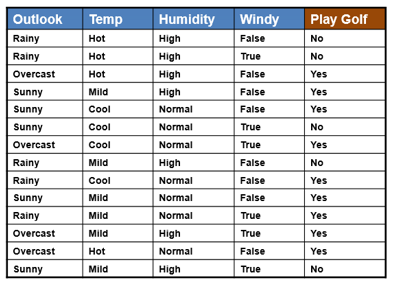

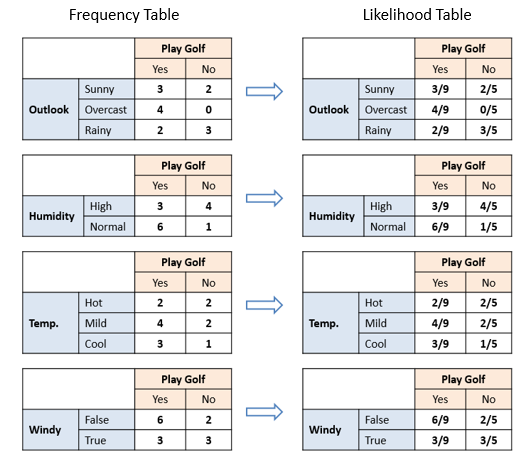

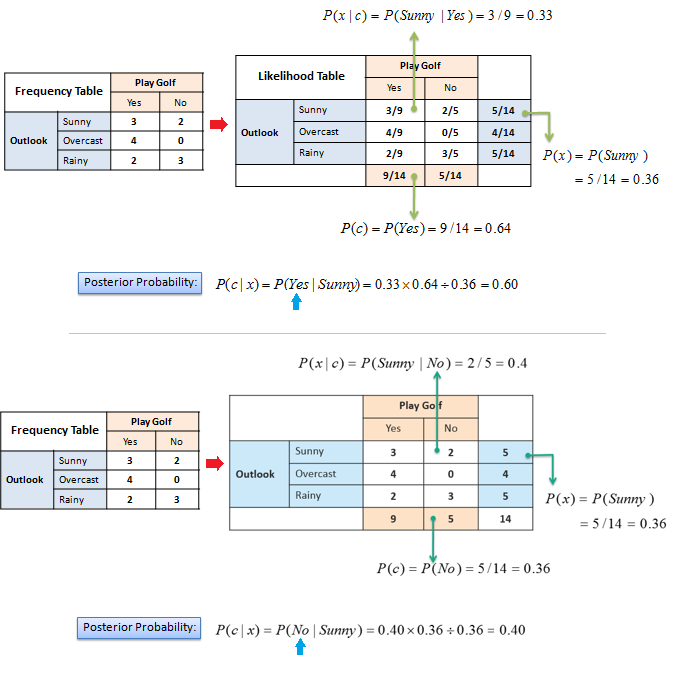

$P(C \mid X) = \frac{P(X \mid C) \, P(C)}{P(X)}$

- $P(C \mid X) = Probabilidade\ Posterior$
  - A probabilidade da classe _C_ dado o atributo _X_.
- $P(X \mid C) = Verossimilhança$
  - A probabilidade de observar _X_ dado que a classe é _C_.
- $P(C) = Probabilidade\ a\ priori$
  - A probabilidade da classe C antes de observar x
- $P(X) = Normalizador$
  - A probabilidade do atributo X

### Naive Bayes em Textos

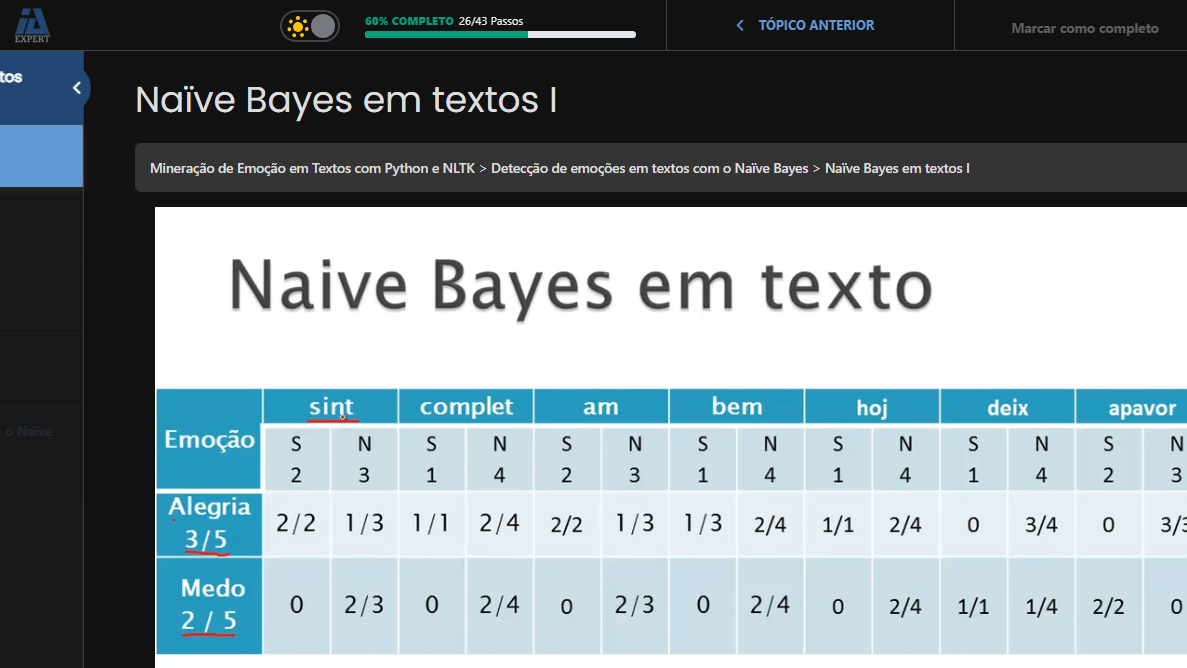

Base de dados completa, com radicais e sem stop words, gera uma tabela de probabilidades para poder classificar uma frase.

In [ ]:
classificador = nltk.NaiveBayesClassifier.train(base_completa)
print(classificador.labels())

['alegria', 'medo']


In [ ]:
print(classificador.show_most_informative_features(7))

Most Informative Features
                     dia = True           alegri : medo   =      2.3 : 1.0
                      am = False            medo : alegri =      1.6 : 1.0
                     med = False          alegri : medo   =      1.4 : 1.0
                     dia = False            medo : alegri =      1.3 : 1.0
                  apavor = False          alegri : medo   =      1.2 : 1.0
                    deix = False          alegri : medo   =      1.2 : 1.0
                     nov = False            medo : alegri =      1.2 : 1.0
None


In [ ]:
teste = "estou com medo"
testestemming = []
stemmer = nltk.stem.RSLPStemmer()

for (palavras) in teste.split():
    comstem = [p for p in palavras.split()]
    try:
        testestemming.append(str(stemmer.stem(comstem[0])))
    except:
      print("erro")
print(testestemming)

['est', 'com', 'med']


In [ ]:
novo = extract_words(testestemming)
print(novo)

{'admir': False, 'muit': False, 'sint': False, 'complet': False, 'am': False, 'maravilh': False, 'sent': False, 'anim': False, 'nov': False, 'bem': False, 'hoj': False, 'bel': False, 'dia': False, 'dirig': False, 'carr': False, 'bonit': False, 'cont': False, 'result': False, 'test': False, 'fiz': False, 'ont': False, 'lind': False, 'amizad': False, 'vai': False, 'dur': False, 'sempr': False, 'amedront': False, 'ameac': False, 'deix': False, 'apavor': False, 'lug': False, 'perd': False, 'outr': False, 'jog': False, 'elimin': False, 'pav': False, 'tom': False, 'cuid': False, 'lobisom': False, 'descobr': False, 'encrenc': False, 'trem': False, 'med': True}


In [ ]:
print(classificador.classify(novo))
distribuicao = classificador.prob_classify(novo)

for classe in distribuicao.samples():
  print("%s: %f" % (classe, distribuicao.prob(classe)))

medo
alegria: 0.041046
medo: 0.958954
